In [2]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
import quandl

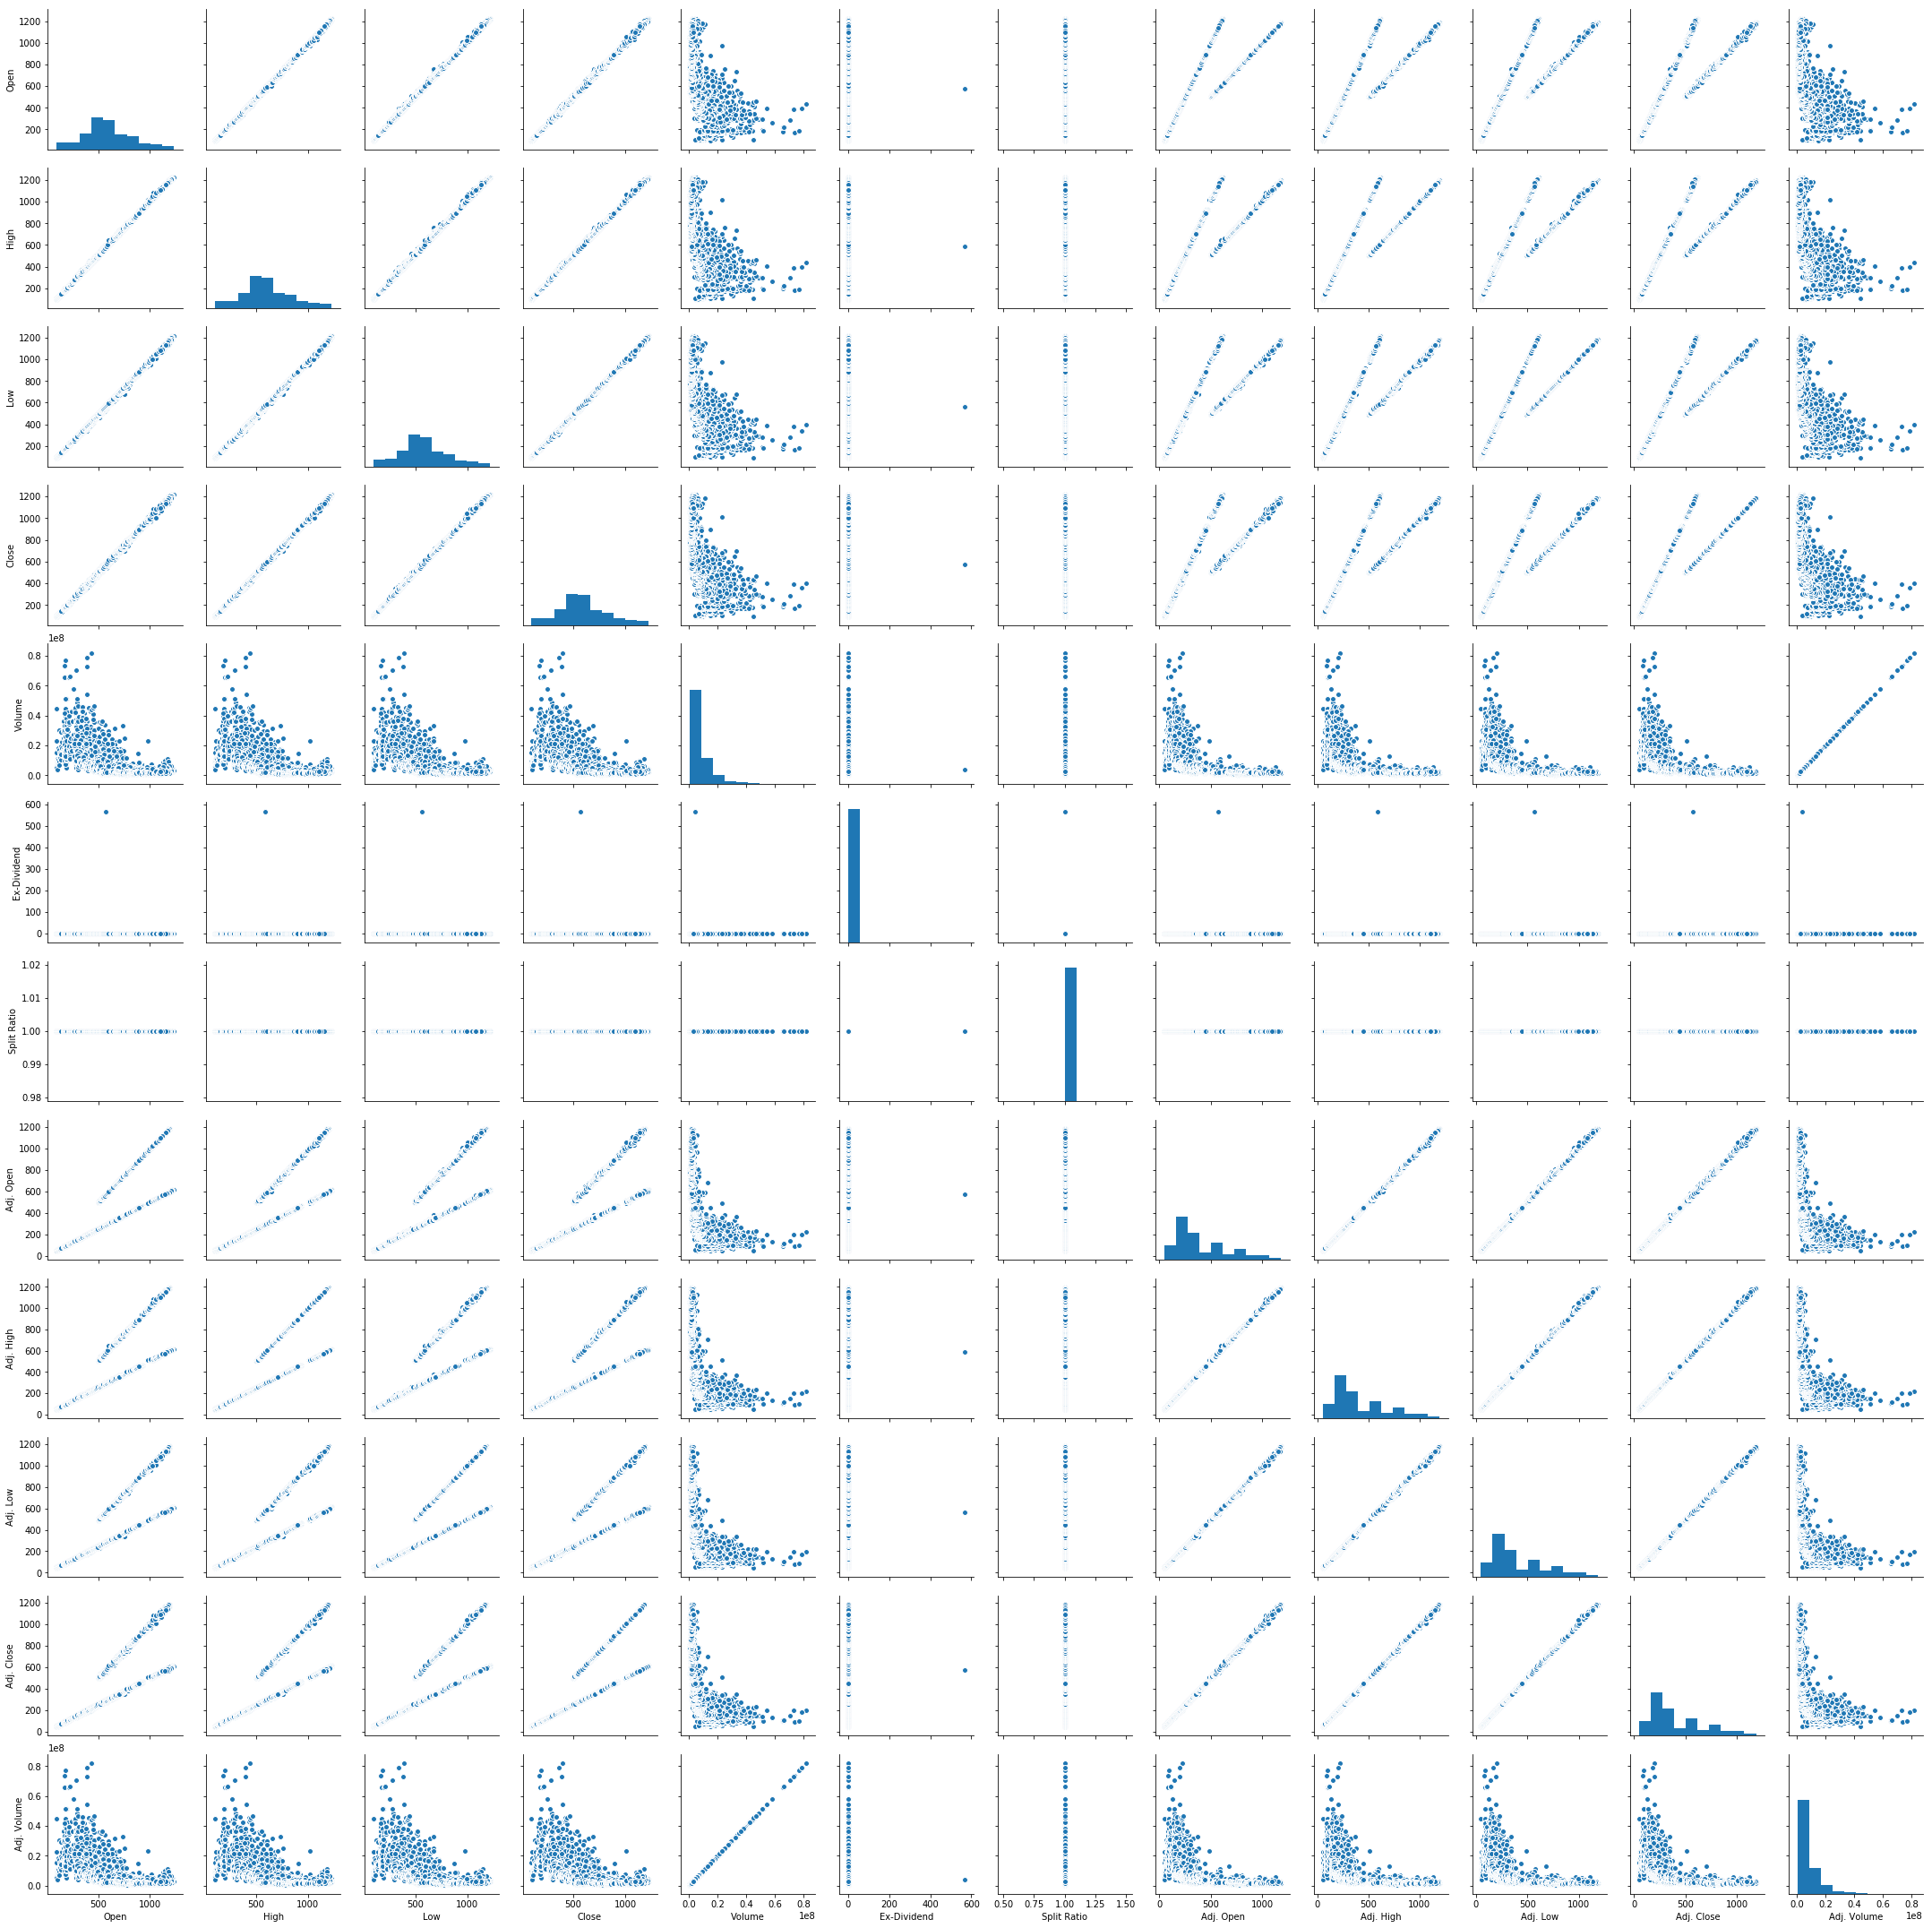

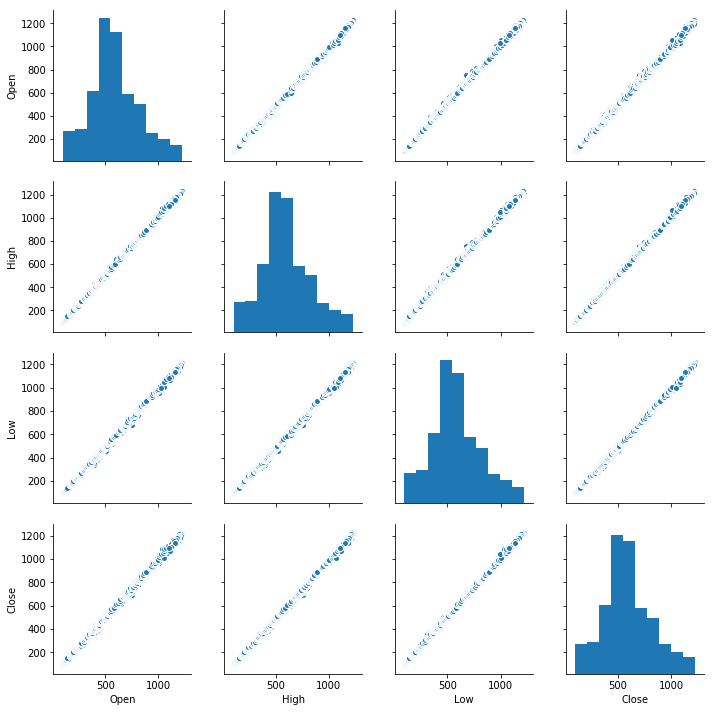

In [3]:
data = quandl.get('Wiki/GOOGL')
sns_plot = sns.pairplot(data)
sns_plot = sns.pairplot(data[['Open', 'High', 'Low', 'Close']])

In [34]:
X = data[['Open', 'High', 'Low']]
y = data.Close
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Close')

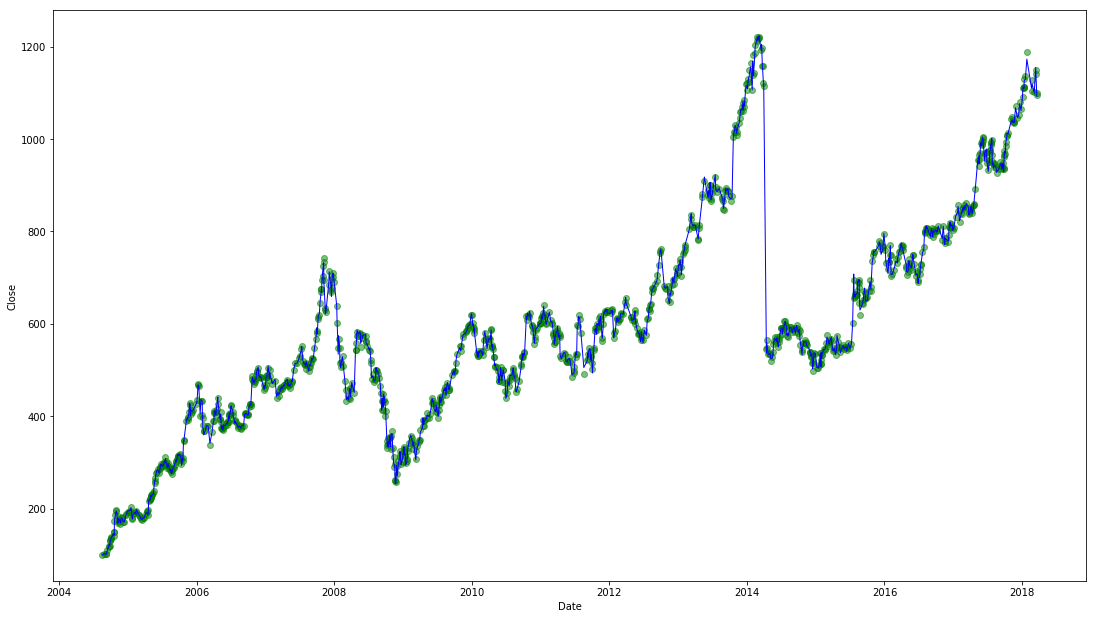

In [44]:
y_test = y_test.sort_index()
X_test = X_test.sort_index()
y_pred = regr.predict(X_test)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(y_test.index, y_test,  color='green', alpha = 0.5)
plt.plot(y_test.index, y_pred, color='blue', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Close")

In [45]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
quality = cross_val_score(regr, X, y, cv = kf, scoring='neg_mean_squared_error')
print(quality.mean())

-12.124397951594544
